In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from util import *

%matplotlib inline

In [2]:
with open('./dataset/ck.plus.pickle','rb') as f:
    ck_data, ck_label = pickle.load(f)

In [3]:
image_hog_ck_data = []
feature_hog_ck_data = []

for image in ck_data :
    image = image.reshape(128,128)
    feature, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, block_norm='L1')
    feature_hog_ck_data.append(feature)
    image_hog_ck_data.append(hog_image)
    
ck_data_train, ck_data_test, ck_label_train, ck_label_test = train_test_split(feature_hog_ck_data, ck_label, test_size=0.25, random_state=42)

              precision    recall  f1-score   support

           😐       0.99      0.99      0.99       323
           😠       0.99      1.00      0.99        90
           😏       1.00      1.00      1.00        23
           😷       0.99      0.99      0.99        86
           😨       1.00      1.00      1.00        42
           😀       0.98      1.00      0.99       129
           😢       1.00      1.00      1.00        44
           😱       1.00      0.98      0.99       121

   micro avg       0.99      0.99      0.99       858
   macro avg       0.99      0.99      0.99       858
weighted avg       0.99      0.99      0.99       858

Accuracy:  0.9906759906759907
Normalized confusion matrix


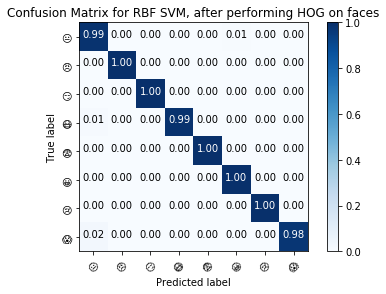

In [4]:
target_classes = get_face_label()

clf = SVC(kernel='rbf', class_weight='balanced', gamma=0.0001, C=1000.0)

clf = clf.fit(ck_data_train, ck_label_train)
ck_label_predict = clf.predict(ck_data_test)

print(classification_report(ck_label_test, ck_label_predict, target_names=target_classes))
print('Accuracy: ' , accuracy_score(ck_label_test, ck_label_predict))

cm = confusion_matrix(ck_label_test, ck_label_predict, labels=range(8))
plot_confusion_matrix(cm, classes=target_classes, title='Confusion Matrix for RBF SVM, after performing HOG on faces', normalize=True)